In [1]:
import pandas as pd
import ast 
import matplotlib.pyplot as plt
import numpy as np

In [39]:
# Open JSON files with article information 
with open("articles.json") as file:
    a = file.readlines()
with open("articles2.json") as file:
    a2 = file.readlines()

# Concatenate the two files
a_con = a+a2    

In [40]:
# Convert the "string JSON" to dictionaries
a_list = []
for item in a_con:
    a_list.append(ast.literal_eval(item))

In [41]:
title_df = pd.DataFrame()
comment_df = pd.DataFrame()
for article in a_list:
    # Extract relevant information from article itself
    title = article["article"]["title"]
    id = article["article"]["id"]
    tag = article["article"]["nodeRef"]["title"]
    total_comments = article["totalComments"]
    # Append to the article DataFrame
    title_df = pd.concat([title_df,pd.DataFrame([{"id":id,"title":title,"tag":tag,"total_comments":total_comments}])],ignore_index=True)

    # Make sure that the article contains comments
    if title_df["total_comments"].iloc[-1]!=0:
        # Get comments
        name = article["article"]["title"]
        df = pd.DataFrame(article["comments"])
        # Drop last name
        df["name"] = df["userIdentity"].apply(lambda x: x["displayName"].split(" ")[0].lower())
        df["votes"] = df["votes"].apply(lambda x: x["totalPositiveVotes"])
        df = df.drop(["id","userIdentity","product"],axis=1)
        # Append to comment DataFrame
        comment_df = pd.concat([comment_df,df],ignore_index=True)
# Drop parent information (parent = original comment that is being referenced)
comment_df = comment_df.drop(["parent","parentId"],axis=1)

(array([216.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   1.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

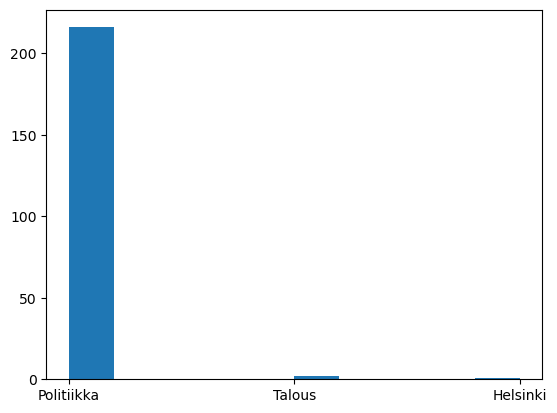

In [42]:
plt.hist(title_df["tag"])

count    219.000000
mean      36.406393
std       30.723451
min        0.000000
25%       14.000000
50%       28.000000
75%       52.500000
max      137.000000
Name: total_comments, dtype: float64


Text(0.5, 1.0, 'Distribution of comments per article')

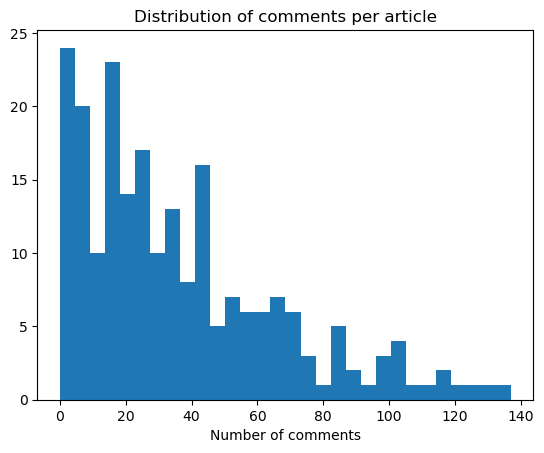

In [43]:
print(title_df["total_comments"].describe())
plt.hist(title_df["total_comments"],bins=30)
plt.xlabel("Number of comments")
plt.title("Distribution of comments per article")

count    7973.000000
mean       93.744011
std       189.904701
min         0.000000
25%         9.000000
50%        28.000000
75%        89.000000
max      2447.000000
Name: votes, dtype: float64


Text(0.5, 1.0, 'Distribution of votes on comments')

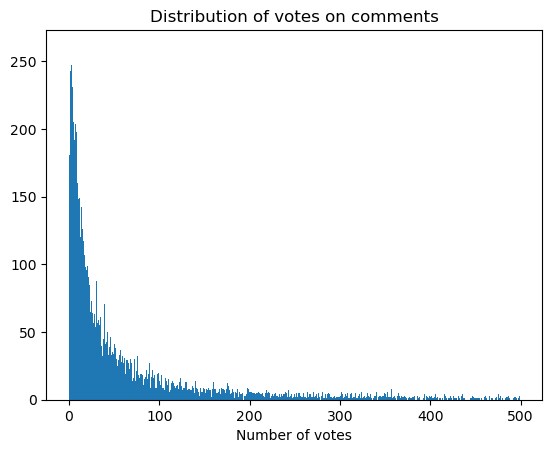

In [44]:
print(comment_df["votes"].describe())
plt.hist(comment_df["votes"],bins=range(0,500))
plt.xlabel("Number of votes")
plt.title("Distribution of votes on comments")

In [45]:
comment_df["len_of_comment"] = comment_df["comment"].apply(lambda x: len(x))

count    7973.000000
mean      460.618713
std       374.907787
min        11.000000
25%       211.000000
50%       351.000000
75%       577.000000
max      2260.000000
Name: len_of_comment, dtype: float64


Text(0.5, 0, 'Length of comment')

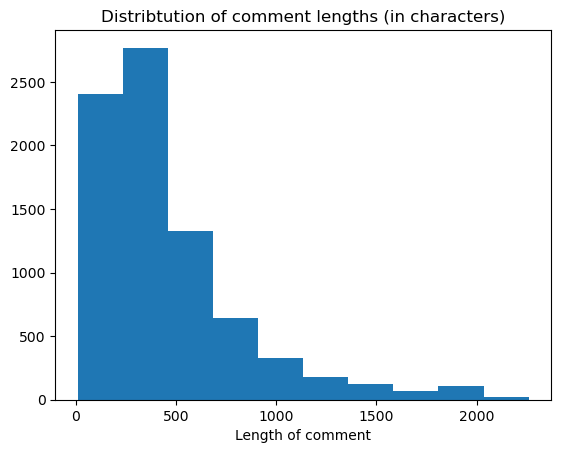

In [46]:
print(comment_df["len_of_comment"].describe())
plt.hist(comment_df["len_of_comment"]);
plt.title("Distribtution of comment lengths (in characters)")
plt.xlabel("Length of comment")

In [59]:
# Creating name list
miehet = pd.read_excel("etunimet.xlsx", sheet_name=0)
miehet["Etunimi"] = miehet["Etunimi"].str.lower()
naiset = pd.read_excel("etunimet.xlsx", sheet_name=3)
naiset["Etunimi"] = naiset["Etunimi"].str.lower()
nimet = pd.merge(naiset, miehet, how="outer", on='Etunimi') 

,Etunimi,Lukumäärä_x,Lukumäärä_y
0,a,21.0,30.0
1,a.,34.0,39.0
2,aabel,NaN,139.0
3,aabraham,NaN,68.0
4,aabram,NaN,17.0
...,...,...,...
22476,özkan,NaN,9.0
22477,özlem,21.0,NaN
22478,ülle,40.0,NaN
22479,ümit,NaN,21.0


In [48]:
def assign_gender(x):
    # Man = 1, Woman = 0, not known = NaN
    if x["Lukumäärä_x"]>x["Lukumäärä_y"] or np.isnan(x["Lukumäärä_y"]):
        return 0
    elif x["Lukumäärä_x"]<x["Lukumäärä_y"] or np.isnan(x["Lukumäärä_x"]):
        return 1
    return np.nan

# Creating gender column
nimet["Sukupuoli"] = nimet.apply(assign_gender,axis=1)

In [49]:
# Adding gender column
comment_df = pd.merge(comment_df,nimet[["Etunimi","Sukupuoli"]],left_on="name",right_on="Etunimi",how="left")#.drop(["Etunimi","name"],axis=1)

In [50]:
# Lowercasing words
comment_df["comment"] = comment_df["comment"].str.lower()

In [51]:
# Removing br-tags
comment_df['comment'] = comment_df['comment'].str.replace(r'<br>|</br>', ' ', regex=True)
# Removing punctuation
#comment_df['comment'] = comment_df['comment'].str.replace(r'[^\w\s]+', '', regex=True)

In [52]:
comment_df[comment_df["Sukupuoli"].isna()]

,articleId,comment,votes,createdAt,name,len_of_comment,Etunimi,Sukupuoli
13,2000010699254,"miten unkari saa edelleen 470€/hlö eu rahaa, k...",28,1726477161587,Nilsson-ollandt,93,NaN,NaN
33,2000010698491,on se kumma kun tässä maassa on syntynyt ammat...,2,1726476334450,Veli-matti,647,NaN,NaN
35,2000010698491,"kahden valtion tavoite hyväksytään, mutta niis...",4,1726474424647,Kortelainen,153,NaN,NaN
46,2000010698491,olisi mukava tietää että minkälaisen palestiin...,1,1726433776435,Veli-matti,1040,NaN,NaN
51,2000010698491,"orpo on rehellinen. lähes kaikista asioista, j...",45,1726425350895,Palmu,475,NaN,NaN
...,...,...,...,...,...,...,...,...
7686,2000010704128,tatuoinnit eivät enää vuosikymmenniin ole liit...,89,1726651733901,Huttunen,496,NaN,NaN
7705,2000010704128,palaute tuli alunperin kansalaiselta. halla-ah...,621,1726602749793,Mäntysaari,689,NaN,NaN
7744,2000010702583,kyseinen sanni aloitti ministerin uransa katai...,20,1726640005650,Jokinen,273,NaN,NaN
7828,2000010701459,paljon on vähätteleviä kommentteja. olisiko tu...,12,1726638605980,Särkiniemi,299,NaN,NaN


In [57]:
397/len(comment_df)*100

4.97930515489778

In [15]:
# with open("stopwords-fi.txt") as f:
#     stopwords = set(f.read().split("\n"))

# # Removing stop-words
# comment_df['comment'] = comment_df['comment'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stopwords)]))

In [16]:
# from nltk.stem.snowball import SnowballStemmer

# stemmer = SnowballStemmer("finnish")

# print(" ".join(stemmer.stem(w) for w in comment_df['comment'].iloc[0].split()))

miel lapsuud vitivalko turk pukeutun ruotsalaissotil märkäjärvellä. evl.dyrssen vapaaehtoisjouko sotur ottiv rintamavastu pohjois suome rajoilla, ilmavoimineen, obs!


In [48]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="fergusq/finbert-finnsentiment")

# # Load model directly
# from transformers import AutoTokenizer, AutoModelForSequenceClassification

# tokenizer = AutoTokenizer.from_pretrained("fergusq/finbert-finnsentiment")
# model = AutoModelForSequenceClassification.from_pretrained("fergusq/finbert-finnsentiment")

c:\Users\joona\anaconda3\envs\project_data\Lib\site-packages\huggingface_hub\file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [49]:
# print("En voi ymmärtää...",pipe("En voi ymmärtää...")[0])
# print("En voi ymmärtää",pipe("En voi ymmärtää")[0])
# print("En voi ymmärtää!",pipe("En voi ymmärtää!")[0])
# print("En voi ymmärtää!!!",pipe("En voi ymmärtää!!!")[0])
# print("EN VOI YMMÄRTÄÄ!!!",pipe("EN VOI YMMÄRTÄÄ!!!")[0])

In [ ]:
# The number of tokens was too high for a certain comment
# Here we find the longest comment (number of words)
max_len = comment_df["comment"].str.split().apply(lambda x: len(x)).max()
# Find index corresponding to this longest comment
idx = comment_df["comment"][comment_df["comment"].str.split().apply(lambda x: len(x))==max_len]
# Drop the troublesome comment
comment_df2 = comment_df.drop(index=idx)

In [111]:
%%time
comment_df2["sentiment"] = comment_df2["comment"].apply(lambda x: pipe(inputs=x)[0]["label"])

CPU times: total: 2h 53s
Wall time: 52min 3s


In [113]:
comment_df2.to_csv("comment.csv")

In [3]:
import pandas as pd 
comment_df2 = pd.read_csv("comment.csv").drop("Unnamed: 0",axis=1)

In [4]:
import matplotlib.pyplot as plt
num_men = len(comment_df2[comment_df2["Sukupuoli"]==1])
num_women = len(comment_df2[comment_df2["Sukupuoli"]==0])
p_men = len(comment_df2[(comment_df2["Sukupuoli"]==1) & (comment_df2["sentiment"]=="POSITIVE")])
p_women = len(comment_df2[(comment_df2["Sukupuoli"]==0) & (comment_df2["sentiment"]=="POSITIVE")])
n_men = len(comment_df2[(comment_df2["Sukupuoli"]==1) & (comment_df2["sentiment"]=="NEUTRAL")])
n_women = len(comment_df2[(comment_df2["Sukupuoli"]==0) & (comment_df2["sentiment"]=="NEUTRAL")])
neg_men = len(comment_df2[(comment_df2["Sukupuoli"]==1) & (comment_df2["sentiment"]=="NEGATIVE")])
neg_women = len(comment_df2[(comment_df2["Sukupuoli"]==0) & (comment_df2["sentiment"]=="NEGATIVE")])
print("Positive (men-women)")
print(p_men/num_men*100)
print(p_women/num_women*100)
print("Neutral (men-women)")
print(n_men/num_men*100)
print(n_women/num_women*100)
print("Negative (men-women)")
print(neg_men/num_men*100)
print(neg_women/num_women*100)
print(p_men+n_men+neg_men,num_men)
print(p_women+n_women+neg_women,num_women)

Positive (men-women)
1.393372982158029
1.9526627218934909
Neutral (men-women)
72.84621920135939
71.53846153846153
Negative (men-women)
25.760407816482584
26.50887573964497
5885 5885
1690 1690


In [6]:
import scipy.stats as stats

In [18]:
# Expected frequencies if gender doesn't matter
f_exp = len(comment_df2[comment_df2["sentiment"]=="POSITIVE"])/len(comment_df2),len(comment_df2[comment_df2["sentiment"]=="NEUTRAL"])/len(comment_df2),len(comment_df2[comment_df2["sentiment"]=="NEGATIVE"])/len(comment_df2)
# Null hupothesis: gender doesn't affect sentiment
print(stats.chisquare(f_obs=[p_men/num_men,n_men/num_men,neg_men/num_men],f_exp=f_exp))
# High p-value indicates that probability of seeing the observed frequecies when the null hypothesis is true is high
# In this case we cannot argue that the null hypothesis is false

Power_divergenceResult(statistic=0.00021060117136980136, pvalue=0.9998947049582272)


Text(0.5, 1.0, 'Gender distribution of comments')

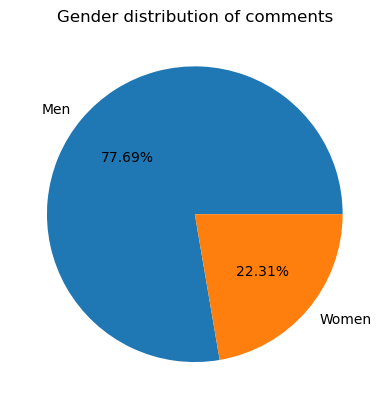

In [8]:
plt.pie([num_men,num_women],labels=["Men","Women"],autopct=lambda x: f"{x:.2f}%")
plt.title("Gender distribution of comments")

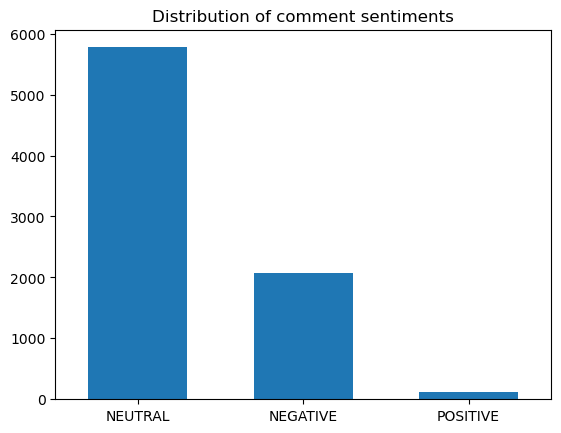

In [9]:
bins = np.arange(4) - 0.3
plt.hist(comment_df2["sentiment"],bins=bins,width=0.6)
plt.xlim(-0.5,2.5)
plt.title("Distribution of comment sentiments")
plt.savefig("images/sentiment_distribution.png")

<Axes: >

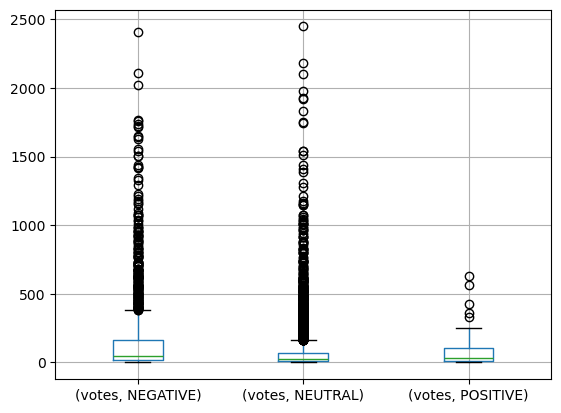

In [19]:
comment_df2[["votes","sentiment"]].pivot(values=["votes"],columns=["sentiment"]).boxplot()
#whis=[0.1, 99.9]

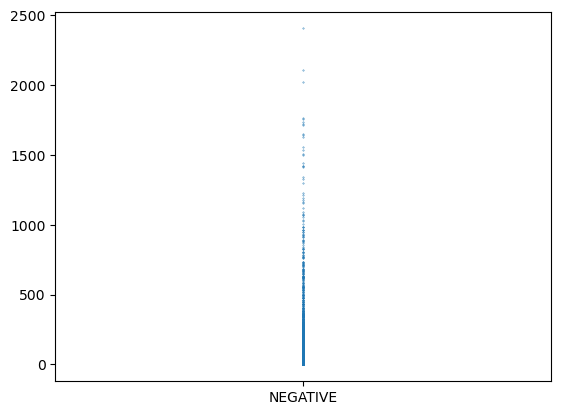

In [176]:
neg = comment_df2[comment_df2["sentiment"]=="NEGATIVE"]
plt.scatter(len(neg)*["NEGATIVE"],neg["votes"],s=0.1)